  # $\color{blue}{Завдання \ 1}$

У цьому завданні вам потрібно завантажити ось цей [датасет](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019/download). Ми з вами вже працювали з ним коли вивчали pandas. Це все також Топ-50 книг, що найбільше продаються на Amazon в період з 2009 по 2019 роки. Потрібно виконати наступне:

1. Створити спарк сесію.
2. Прочитати датасет в датафрейм.
3. Використовуючи тільки RDD, обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7
4. Побудувати гістограму розподілу рецензій (стовпчик Reviews).
5. Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".
6. Використовуючи бібліотеку seaborn, побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".

In [150]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [151]:
#1 Створити спарк сесію.
from pyspark.sql import SparkSession

spark_session = SparkSession.builder.getOrCreate()

In [152]:
#2 Прочитати датасет в датафрейм.
df = spark_session.read.csv('/content/bestsellers with categories.csv', header=True, inferSchema=True)
df = df.withColumnRenamed('User Rating', 'User_Rating')
df.show()

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                Name|              Author|User_Rating|Reviews|Price|Year|      Genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|10-Day Green Smoo...|            JJ Smith|        4.7|  17350|    8|2016|Non Fiction|
|   11/22/63: A Novel|        Stephen King|        4.6|   2052|   22|2011|    Fiction|
|12 Rules for Life...|  Jordan B. Peterson|        4.7|  18979|   15|2018|Non Fiction|
|1984 (Signet Clas...|       George Orwell|        4.7|  21424|    6|2017|    Fiction|
|5,000 Awesome Fac...|National Geograph...|        4.8|   7665|   12|2019|Non Fiction|
|A Dance with Drag...| George R. R. Martin|        4.4|  12643|   11|2011|    Fiction|
|A Game of Thrones...| George R. R. Martin|        4.7|  19735|   30|2014|    Fiction|
|A Gentleman in Mo...|         Amor Towles|        4.7|  19699|   15|2017|    Fiction|
|A Higher Loyalty:...|         James Comey|

In [153]:
#3 Використовуючи тільки RDD, обчислити середню ціну всіх книг, у яких рейтинг вищий за 4.7
df.filter(df['User_Rating'] > 4.7).groupBy().avg('Price').show()

+-----------------+
|       avg(Price)|
+-----------------+
|10.69832402234637|
+-----------------+



<Axes: ylabel='Frequency'>

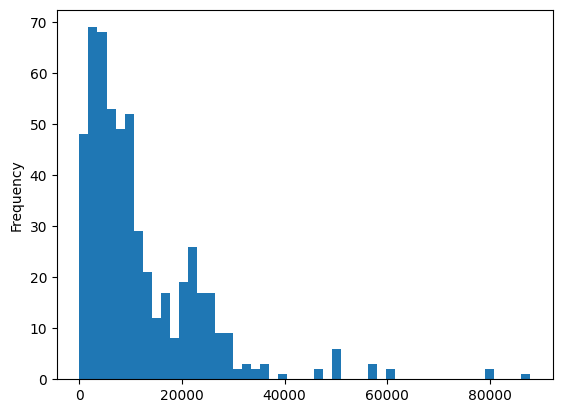

In [154]:
#4 Побудувати гістограму розподілу рецензій (стовпчик Reviews).
df.toPandas()['Reviews'].plot(kind='hist', bins=50)

In [155]:
#5 Побудувати матрицю кореляції для стовпців "User Rating", "Reviews" та "Price".
df.toPandas()[['User_Rating', 'Reviews', 'Price']].corr()

,User_Rating,Reviews,Price
User_Rating,1.000000,-0.001729,-0.133086
Reviews,-0.001729,1.000000,-0.109182
Price,-0.133086,-0.109182,1.000000


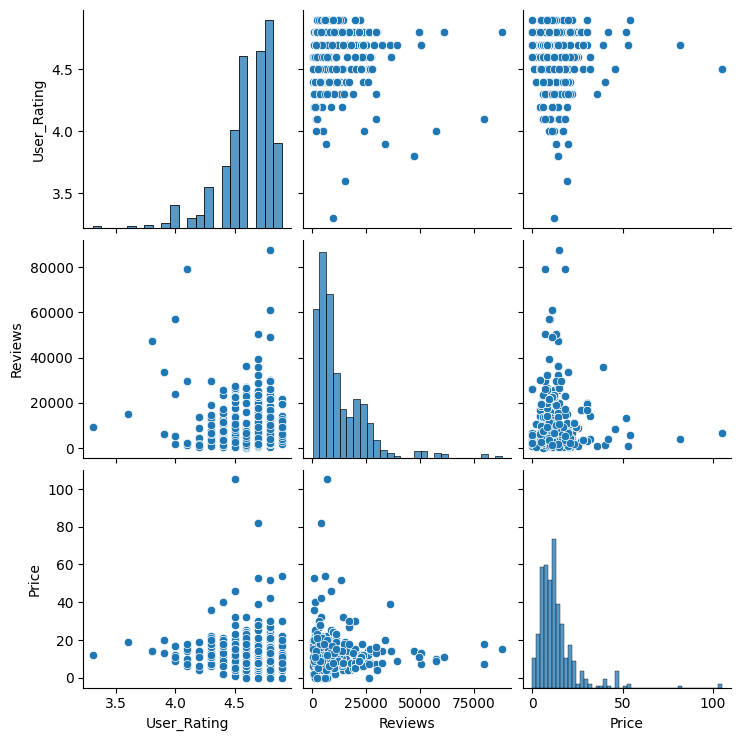

In [156]:
#6 Використовуючи бібліотеку seaborn, побудувати парні графіки (pairplots) стовпців "User Rating", "Reviews" та "Price".
import seaborn as sns

sns.pairplot(df[['User_Rating', 'Reviews', 'Price']].toPandas())

 # $\color{blue}{Завдання \ 2}$

Під час виконання цього завдання дозволяється використовувати лише Spark SQL. Для датасету з попереднього завдання виконайте наступне:

1. Знайдіть автора з найвищим рейтингом.
2. Знайдіть трьох авторів із найнижчим рейтингом.
3. Визначте, який автор отримав найбільшу кількість рецензій.
4. Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.
5. Визначте, яка книга жанру "Fiction" має найменший рейтинг.
6. Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.

In [157]:
df.createOrReplaceTempView("Bestsellers")

In [158]:
#1 Знайдіть автора з найвищим рейтингом.
spark_session.sql(
    '''
    SELECT Author, User_Rating
    FROM Bestsellers
    ORDER BY User_Rating DESC
    LIMIT 1
    '''
    ).show()

+---------------+-----------+
|         Author|User_Rating|
+---------------+-----------+
|Bill Martin Jr.|        4.9|
+---------------+-----------+



In [159]:
#2 Знайдіть трьох авторів із найнижчим рейтингом.
spark_session.sql(
    '''
    SELECT Author, User_Rating
    FROM Bestsellers
    ORDER BY User_Rating
    LIMIT 3
    '''
    ).show()

+------------+-----------+
|      Author|User_Rating|
+------------+-----------+
|J.K. Rowling|        3.3|
|  Harper Lee|        3.6|
|   E L James|        3.8|
+------------+-----------+



In [160]:
#3 Визначте, який автор отримав найбільшу кількість рецензій.
spark_session.sql(
    '''
    SELECT Author, SUM(Reviews) as total_reviews
    FROM Bestsellers
    GROUP BY Author
    ORDER BY total_reviews DESC
    LIMIT 1
    '''
    ).show()

+---------------+-------------+
|         Author|total_reviews|
+---------------+-------------+
|Suzanne Collins|       278329|
+---------------+-------------+



In [161]:
#4 Визначте, який автор написав найбільшу кількість книг за весь доступний у даних період.
spark_session.sql(
    '''
    SELECT Author, COUNT(Name) as total_books
    FROM Bestsellers
    GROUP BY Author
    ORDER BY total_books DESC
    LIMIT 1
    '''
    ).show()

+-----------+-----------+
|     Author|total_books|
+-----------+-----------+
|Jeff Kinney|         12|
+-----------+-----------+



In [162]:
#5 Визначте, яка книга жанру "Fiction" має найменший рейтинг.
spark_session.sql(
    '''
    SELECT Name, User_Rating, Genre
    FROM Bestsellers
    WHERE Genre = 'Fiction'
    ORDER BY User_Rating
    LIMIT 1
    '''
    ).show()

+------------------+-----------+-------+
|              Name|User_Rating|  Genre|
+------------------+-----------+-------+
|The Casual Vacancy|        3.3|Fiction|
+------------------+-----------+-------+



In [163]:
#6 Визначте, яка книга жанру "Non Fiction" має найвищий рейтинг.
spark_session.sql(
    '''
    SELECT Name, User_Rating, Genre
    FROM Bestsellers
    WHERE Genre = 'Non Fiction'
    ORDER BY User_Rating DESC
    LIMIT 1
    '''
    ).show()

+--------------------+-----------+-----------+
|                Name|User_Rating|      Genre|
+--------------------+-----------+-----------+
|Hamilton: The Rev...|        4.9|Non Fiction|
+--------------------+-----------+-----------+



 # $\color{blue}{Завдання \ 3}$

Побудуйте гістограму середньої кількості рецензій за роками. У вигляді окремої гістограми візуалізуйте кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період.

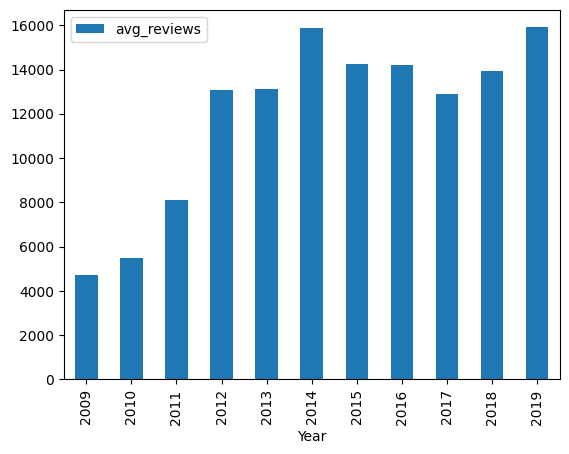

In [164]:
# середня кількості рецензій за роками
df_plot1 = spark_session.sql(
    '''
    SELECT Year, AVG(Reviews) as avg_reviews
    FROM Bestsellers
    GROUP BY Year 
    ORDER BY Year
    '''
    )
df_plot1 = df_plot1.toPandas().plot(x='Year', y='avg_reviews', kind='bar')

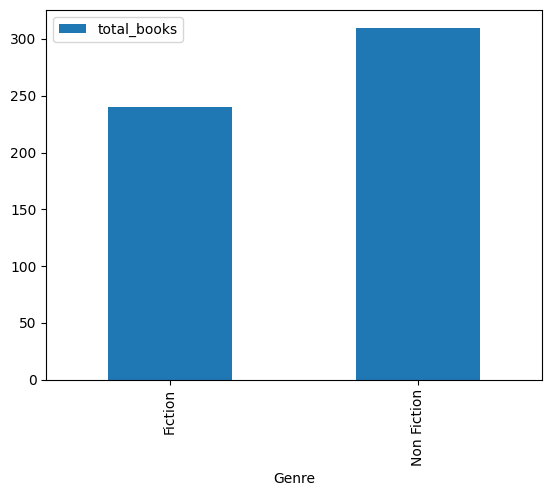

In [165]:
# кількість книг жанру "Fiction" та "Non Fiction" за весь доступний період
df_plot2 = spark_session.sql(
    '''
    SELECT Genre, COUNT(*) total_books
    FROM Bestsellers
    GROUP BY Genre 
    '''
    )
df_plot2 = df_plot2.toPandas().plot(x='Genre', y='total_books', kind='bar')